# Social Media Data - WhatsApp

## WhatsApp chat:  Studio Ghibli edition

[Simone Lombardini](https://sites.google.com/view/simone-lombardini/home-page) - 2 May 2020

**WhatsApp Data**

WhatsApp has become one of the most frequently used communication channels. Chances are that if you are reading this, you are already using WhatsApp on a daily base, so there is no need to explain what this is.

You probably have noticed as well, that WhatsApp has moved away from just being message service among personal contacts, and it is increasingly becoming a sort of restricted social network. Think about all the chat groups you are involved in. Are these all with close friends you know? 

It is certainly not my case. I started using WhatsApp as a substitute for SMS, but cheaper, faster and nicer. Then they arrived the chat groups with friends, family members, and colleagues. And now, I don't even know how I'm in chat groups with people I don't even directly know. For example: the chat group with all the parents from the nursery, or the neighbours in the block. These are chats with over 50 people, from which I directly know only a small number of them. 

This [BBC podcast](https://www.bbc.co.uk/programmes/w3cswqtl) from 2018 already described how false rumours spread on WhatsApp in India had prompted fearful mobs to kill innocent people. However, contrary to other social media, authorities were not able to anticipate these rumours
as the content shared via WhatsApp is available only to those in the group itself. Unless you are part of these groups, it is not possible to access the data. Yet, if you are a group member, it is extremely easy to do it so. 

As Nicole Schwitter from Warwick University explained me in this podcasts [(Coronavirus and web data analysis)](https://oxfamindepth.buzzsprout.com/833005/3629053-coronavirus-and-web-data-analysis), WhatsApp data requires the explicit consent from all the individuals from which you are analysing the data from. While with Twitter data, for example, it is reasonable to assume that when users are posting content on social media, they are doing it expecting this to be publicly available to everyone online. With WhatsApp this is not the case, as users are reasonably expecting their content to seen solely by to those they directed to. 

This is then posing serious ethical and logistical challenges when it comes to conducting analysis on WhatsApp data. While technology, as you will see, it is quite easy to obtain and analyse the data. Ethically you need to obtain explicit informed consent from all the group chat participants, as well as present the results in a way that is not exposing and sensitive personable identifiable information. 

I very much suggest these guidelines from Nicole and Ulf Liebe [(Going Digital: Web data collection using Twitter as an example)](https://policy-practice.oxfam.org.uk/publications/going-digital-web-data-collection-using-twitter-as-an-example-620948), as well as [Bit by Bit: Social Research in the Digital Age](https://www.bitbybitbook.com/).      

In this exercise, I used a WhatsApp chat with eight friends. Everyone gave explicit consent prior to publishing these results, and their names have been altered to respect everyone privacy using some of my favourite characters from the [Studio Ghibli](https://en.wikipedia.org/wiki/Studio_Ghibli)'s movies. 

I will start with summary statistics and visualisation about messages exchanges. Then conduct some text and sentiment analysis on the text messages and emoticons. I will frame these as a pub quiz questions, to use them as entertainment for the next zoom call with my friends. 

As usual, I would love to hear what you think.

**Pub-quiz Questions:**

1. How many messages have been exchanged since when the chat group started? 

1. Who wrote the first message and when?

1. Who sent the highest number of messages?

1. Who sent the lowest number of letters?

1. Who sent the highest number of individual words?

1. Who has sent the highest number of individual words this year?

1. At what time most of the messages are written?

1. Who wrote most frequently at 4 am, and about what?

1. What is the month of the year where most messages were sent? 

1. What was the year where the least number of messages were sent? 

1. Who has the highest average polarity score?

1. How did the daily average polarity score change over time?

1. Who has the lowest average subjectivity score?

1. How many words are there in all the messages?

1. What are the three most frequent words? 

1. For each group member, what is their most frequently used word?  

1. What are the three most frequently used emoji?

1. For each group member, what is their most frequently used emoji?

In [1]:
# basic
import os
import pandas as pd
import numpy as np    
import datetime as dt

# graphs
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# text analysis
import string 
import re 
import nltk
import regex

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

from textblob import TextBlob

# word clouds
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# word frequency
from collections import Counter

# emoji
import emoji
import pickle

### 1- How many messages have been exchanged since when the chat group started?

In [2]:
f = open('data/WhatsApp Chat with Bella ciao (1).txt', 'r', encoding="utf8")
messages = re.findall('(.*), (.*) - (.*): (.*)', f.read())
df = pd.DataFrame(messages,columns=['date','hr','author','msg'])
df.shape

(10264, 4)

Remove the real names and replace with fantasy names

In [3]:
df.author = df.author.replace("[REAL NAME]", "Chihiro")
df.author = df.author.replace("[REAL NAME]", "Haku")
df.author = df.author.replace("[REAL NAME]", "Ponyo")
df.author = df.author.replace("[REAL NAME]", "Howl")
df.author = df.author.replace("[REAL NAME]", "Totoro")
df.author = df.author.replace("[REAL NAME]", "Sophie")
df.author = df.author.replace("[REAL NAME]", "Sophie") # this contant is twice as has changed phone number
df.author = df.author.replace("[REAL NAME]", "Satsuki")
df.author = df.author.replace("[REAL NAME]", "Mei")
df.author = df.author.replace("[REAL NAME]", "Kiki")

In [4]:
df = df[(df.author == 'Chihiro') | (df.author == 'Haku') | (df.author == 'Ponyo') | (df.author == 'Totoro')| (df.author == 'Howl')| (df.author == 'Kiki')| (df.author == 'Satsuki')| (df.author == 'Mei')| (df.author == 'Sophie')]
df.shape

(10199, 4)

### 2- Who wrote the first message and when?

In [5]:
print(df.author[0])
print(df.date[0])

Ponyo
26/09/2015


### 3- Who sent the highest number of messages?

In [6]:
# Set graphic parameters
sns.set(style="darkgrid", context="paper")

In [7]:
author_value_counts = df[['author','msg']].groupby('author', as_index = False).count()
author_value_counts

,author,msg
0,Chihiro,1036
1,Haku,679
2,Howl,1407
3,Kiki,444
4,Mei,1206
5,Ponyo,2795
6,Satsuki,747
7,Sophie,1533
8,Totoro,352


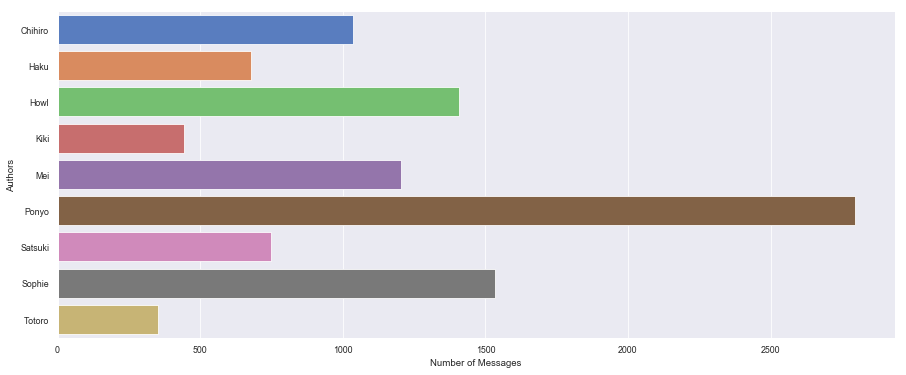

In [8]:
#sns.palplot(sns.color_palette("muted"))
plt.figure(figsize=(15,6))
sns.barplot(x="msg", y="author", data=author_value_counts, palette="muted")
plt.xlabel('Number of Messages')
plt.ylabel('Authors')
plt.savefig("image/n_msg_by_author.png")

### 4 - Who sent the lowest number of letters?

In [9]:
df['letter_count'] = df['msg'].apply(lambda s : len(s))

In [10]:
author_letter_counts = df[['author','letter_count']].groupby('author', as_index = False).sum()
author_letter_counts

,author,letter_count
0,Chihiro,46790
1,Haku,23737
2,Howl,37699
3,Kiki,19764
4,Mei,42587
5,Ponyo,84801
6,Satsuki,17423
7,Sophie,48381
8,Totoro,10145


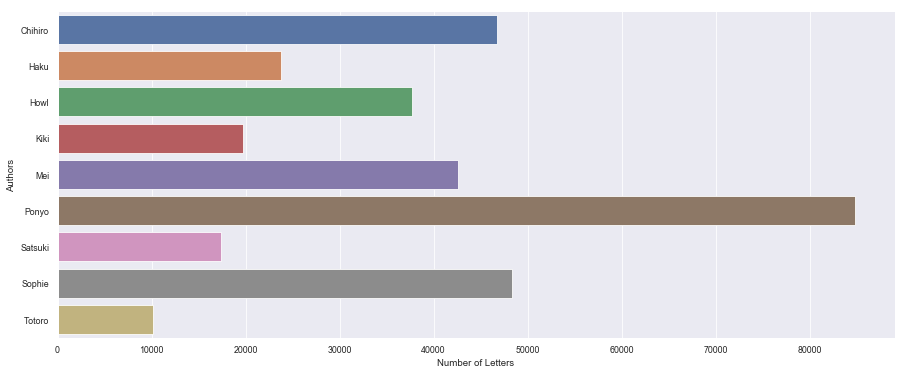

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x="letter_count", y="author", data=author_letter_counts)
plt.xlabel('Number of Letters')
plt.ylabel('Authors')
plt.savefig("image/n_letters_by_author.png")

### 5 - Who sent the highest number of individual words?

In [12]:
df['word_count'] = df['msg'].apply(lambda s : len(s.split(' ')))

In [13]:
author_word_counts = df[['author','word_count']].groupby('author', as_index = False).sum()
author_word_counts

,author,word_count
0,Chihiro,8782
1,Haku,4275
2,Howl,7046
3,Kiki,3595
4,Mei,7209
5,Ponyo,16327
6,Satsuki,3497
7,Sophie,9608
8,Totoro,1239


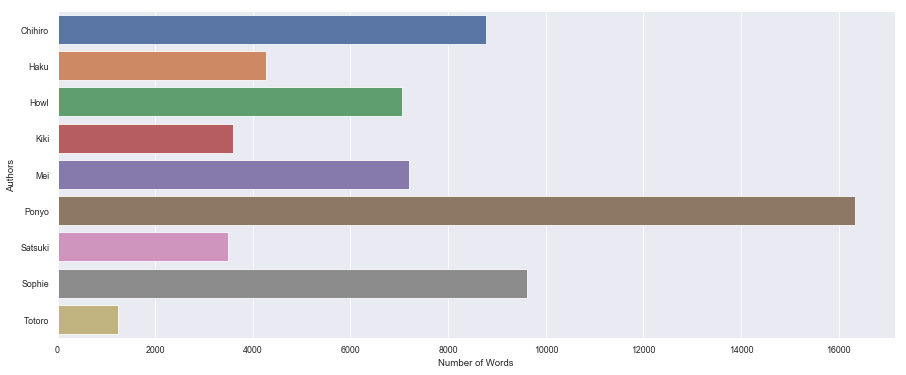

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x="word_count", y="author", data=author_word_counts)
plt.xlabel('Number of Words')
plt.ylabel('Authors')
plt.savefig("image/n_words_by_author.png")

[]

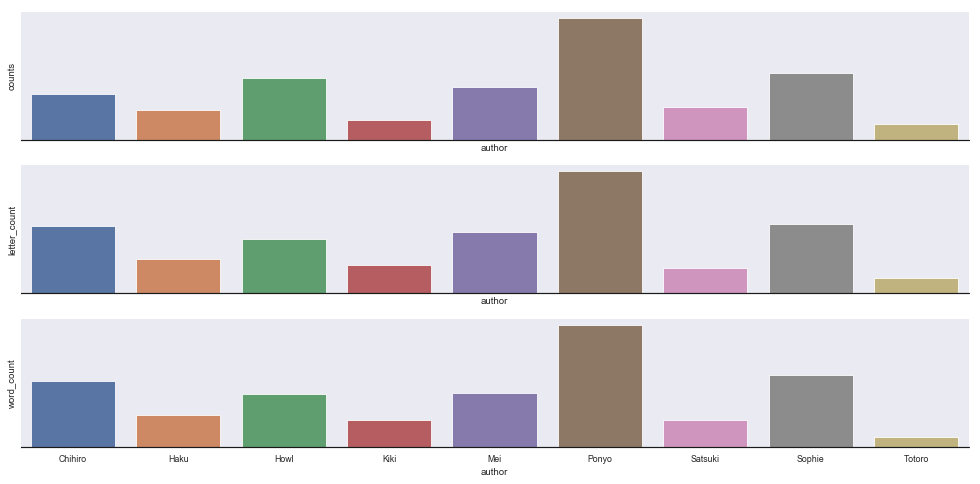

In [15]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(17, 8), sharex=True)

# Randomly reorder the data to make it qualitative
x1 = author_value_counts.author
y1 = author_value_counts.msg
sns.barplot(x=x1, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("counts")

# Center the data to make it diverging
x2 = author_letter_counts.author
y2 = author_letter_counts.letter_count
sns.barplot(x=x2, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("letter_count")

# Word counts
x3 = author_word_counts.author
y3 = author_word_counts.word_count
sns.barplot(x=x3, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("word_count")


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=3)

### 6- Who has sent the highest number of individual words this year?
#### Change overtime word_count

In [16]:
df['year'] = df['date'].apply(lambda x : x.split('/')[2])
author_word_year_sum = df[['author','word_count', 'year']].groupby(['author', 'year'], as_index = False).sum()
author_word_year_sum['year'] = author_word_year_sum['year'].astype(str).astype(int)
author_word_year_sum.head(10)

,author,year,word_count
0,Chihiro,2015,575
1,Chihiro,2016,2829
2,Chihiro,2017,1494
3,Chihiro,2018,886
4,Chihiro,2019,1152
5,Chihiro,2020,1846
6,Haku,2015,211
7,Haku,2016,1301
8,Haku,2017,825
9,Haku,2018,267


([<matplotlib.axis.XTick at 0x2c72e9dc1d0>,
 <a list of 49 Text xticklabel objects>)

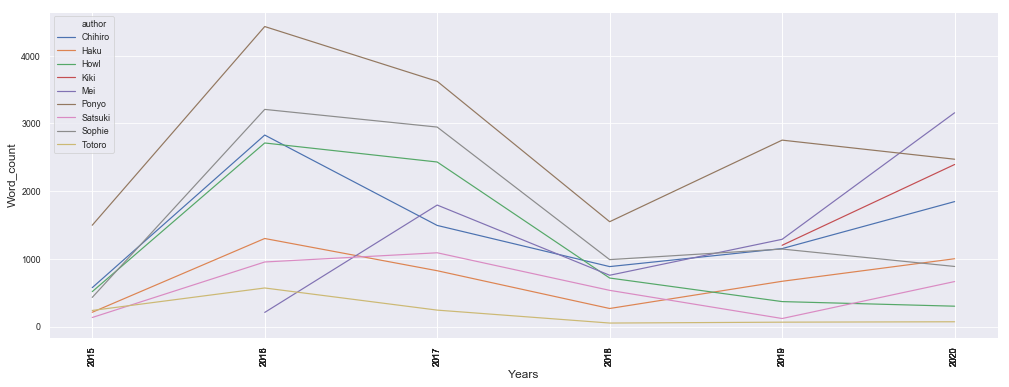

In [17]:
x = author_word_year_sum['year']
y = author_word_year_sum['word_count']

plt.figure(figsize=(17,6))

sns.lineplot(x, y, hue=author_word_year_sum["author"])

plt.xlabel("Years", fontsize= 12)
plt.ylabel("Word_count", fontsize= 12)

plt.xticks(x, x, rotation='vertical')

### 7- At what time most of the messages are written?

Text(0, 0.5, 'Hour of Day')

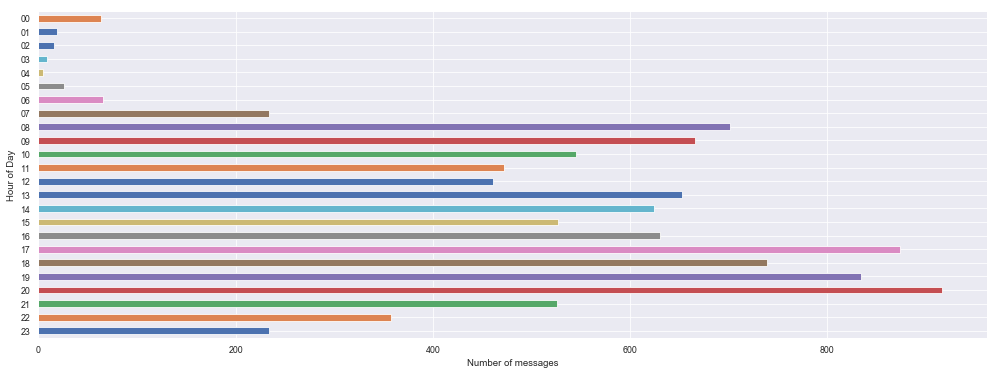

In [18]:
df['hour'] = df['hr'].apply(lambda x : x.split(':')[0])
plt.figure(figsize=(17,6))
df['hour'].value_counts().sort_index(ascending=False).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')

### 8- Who wrote most frequently at 4 am, and about what?

In [19]:
fourammsg = df[df['hour']=='04']
fourammsg

,date,hr,author,msg,letter_count,word_count,year,hour
3780,25/12/2016,04:37,Howl,Merry Christmas!!,17,2,2016,04
3781,25/12/2016,04:38,Howl,"Marta, tanti auguri!!",21,3,2016,04
4369,17/03/2017,04:44,Sophie,Ha ha ...I love that last one 😀,31,8,2017,04
7591,10/02/2019,04:39,Howl,And me plus one 😊,17,5,2019,04
9966,18/04/2020,04:38,Totoro,Nice,4,1,2020,04


### 9- What is the month of the year where most messages were sent? 

Text(0, 0.5, 'Month')

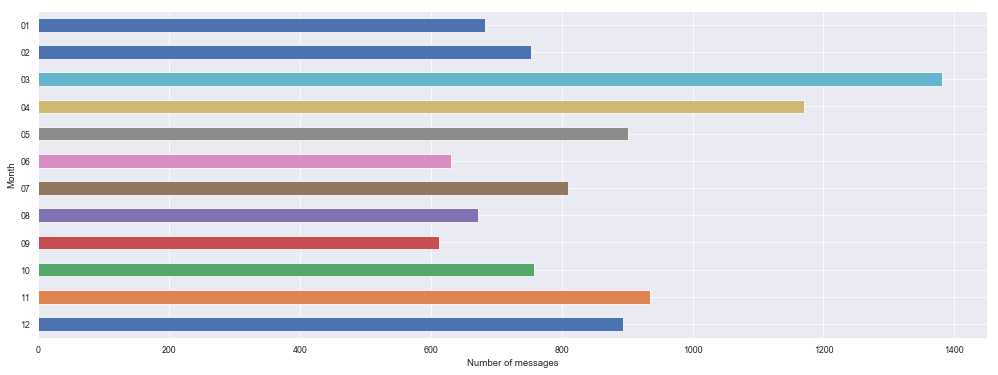

In [20]:
df['month'] = df['date'].apply(lambda x : x.split('/')[1])
plt.figure(figsize=(17,6))
df['month'].value_counts().sort_index(ascending=False).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Month')

### 10- What was the year where the least number of messages were sent? 

Text(0, 0.5, 'Year')

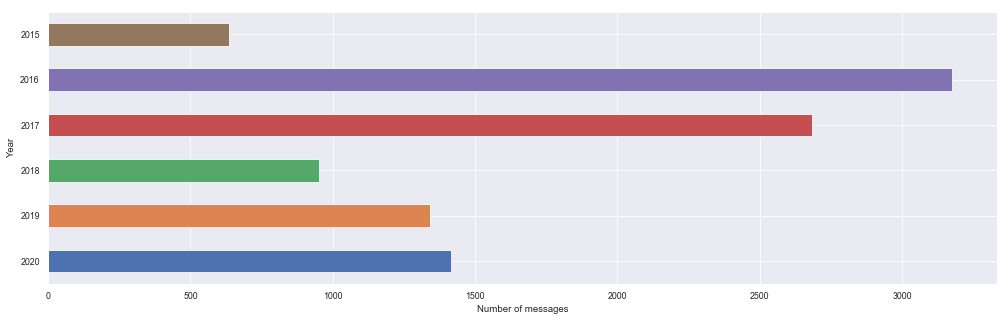

In [21]:
df['year'] = df['date'].apply(lambda x : x.split('/')[2])
plt.figure(figsize=(17,5))
df['year'].value_counts().sort_index(ascending=False).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Year')

## Text and Emoji analysis

### Sentiment analysis

In [22]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['media', 'omit']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text = re.sub("(\\d|\\W)+"," ",text)
  text = re.sub(r'[^\x00-\x7f]',r'', text) 
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [23]:
def evaluate_polarity(text):
  return TextBlob(text).sentiment[0]

def evaluate_subjectivity(text):
  return  TextBlob(text).sentiment[1]

In [24]:
df['polarity'] = df.msg.apply(evaluate_polarity)
df['subjectivity'] = df.msg.apply(evaluate_subjectivity)

#### Polarity
The polarity score is a float within the range (-1.0, 1.0), with negative values associated with more negative words, and positive values associated with positive words. Here below some examples of positive and negative messagges.

In [25]:
max_polarity = df[df.polarity == df.polarity.max()]
max_polarity.msg.head(10)

59                               Very good! See you soon!
415                                    Great! Afternoon..
534                                   Ours was Great too!
599       Nicola, is that your parents' shop? Beautiful!!
612                                    Happy birthday!!!!
615                                 Happy Birthday Marta!
619                                Happy birthday Marta!!
620                  Happy birthday piazza di Martinengo!
641     The bergamaschi n i celebrated together! !!!!!!!!
1047    Hi guys! I will be at the rusty pub tonight fo...
Name: msg, dtype: object

In [26]:
min_polarity = df[df.polarity == df.polarity.min()]
min_polarity.msg.head(10)

1067    R u guys takin the piss with all this annoying...
1168                         Sorry!!!! Very very annoying
1372    About to have the3rd instalment out of 4 of th...
2320                   We are going to green man!!!!!!!!!
2395                                       This is insane
2432         Why is it f sunny out there?! It's Annoying!
3318                                boring uk bureaucracy
3332                                        Fuckin insane
3516                               Sean r we the idiots?!
3583            this marta is borderline hysterical today
Name: msg, dtype: object

### 11- Who has the highest average polarity score?

In [27]:
author_polarity_mean = df[['author','polarity']].groupby('author', as_index = False).mean()
author_polarity_mean

,author,polarity
0,Chihiro,0.147633
1,Haku,0.104087
2,Howl,0.122876
3,Kiki,0.173748
4,Mei,0.051069
5,Ponyo,0.072391
6,Satsuki,0.049779
7,Sophie,0.117451
8,Totoro,0.090918


<Figure size 1224x720 with 0 Axes>

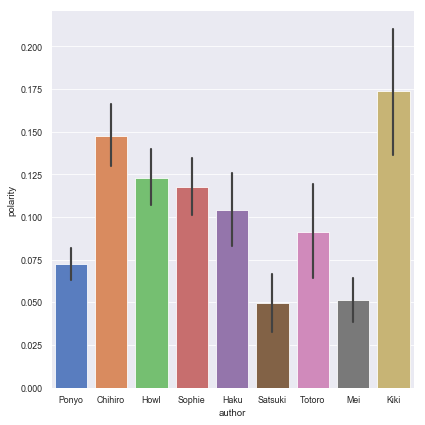

In [28]:
plt.figure(figsize=(17,10))
sns.catplot(x="author", y="polarity", data=df, height=6, kind="bar", palette="muted")
plt.savefig("image/polarity_author.png")

### 12- How did the daily average polarity score change over time?

In [29]:
import altair as alt

date_polarity_mean = df[['date', 'polarity']].groupby('date', as_index = False).mean()

alt.Chart(date_polarity_mean).mark_bar().encode(
    x="date:T",
    y="polarity:Q",
    color=alt.condition(
        alt.datum.polarity > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=800)

alt.Chart(...)

In [30]:
print(date_polarity_mean[date_polarity_mean['polarity']==date_polarity_mean['polarity'].min()])

          date  polarity
54  03/05/2017      -0.4


In [31]:
df[df.date=='03/05/2017']

,date,hr,author,msg,letter_count,word_count,year,hour,month,polarity,subjectivity
4777,03/05/2017,21:39,Chihiro,"Hey guys, sorry for the late message but if yo...",190,39,2017,21,05,-0.4,0.8


### 13- Who has the lowest average subjectivity score?

The subjectivity is a float within the range (0.0, 1.0) where 0.0 is very objective and 1.0 is very subjective.

In [32]:
author_subjectivity_mean = df[['author','subjectivity']].groupby('author', as_index = False).mean()
author_subjectivity_mean

,author,subjectivity
0,Chihiro,0.303754
1,Haku,0.217179
2,Howl,0.267389
3,Kiki,0.318816
4,Mei,0.193358
5,Ponyo,0.179538
6,Satsuki,0.195080
7,Sophie,0.318313
8,Totoro,0.233212


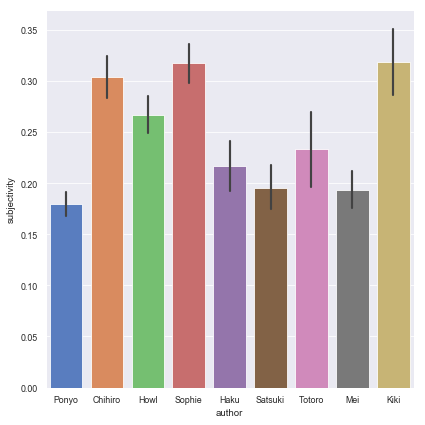

In [33]:
g = sns.catplot(x="author", y="subjectivity", data=df, height=6, kind="bar", palette="muted")
plt.savefig("image/subjectivity.png")

### 14- How many words are there in all the messages?

In [34]:
text = " ".join(msg for msg in df.msg)
print ("There are {} words in all the messsages.".format(len(text)))

cleantext = clean_txt(text)
print("There are {} words in all the messages after cleaning.".format(len(cleantext)))

There are 341525 words in all the messsages.
There are 195827 words in all the messages after cleaning.


### Word cloud

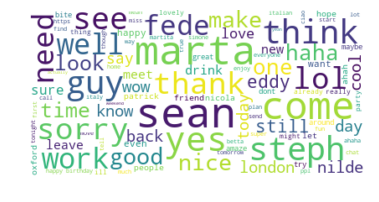

<Figure size 432x288 with 0 Axes>

In [35]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cleantext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("image/wordclous.png")

### 15- What are the three most frequent words?

In [36]:
# split() returns list of all the words in the string 
split_it = cleantext.split() 
  
# Pass the split_it list to instance of Counter class. 
CounterVar = Counter(split_it)
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = CounterVar.most_common(10) 
  
most_occur

[('marta', 360),
 ('sean', 337),
 ('come', 318),
 ('guy', 268),
 ('thank', 256),
 ('get', 229),
 ('yes', 216),
 ('happy', 212),
 ('sorry', 206),
 ('look', 203)]

### 16- For each group member, what is their most frequently used word? 

In [37]:
def mostfrequword (aut):
    m_aut = df[df['author']==aut]
    text_aut = " ".join(msg for msg in m_aut.msg)
    cleantext_aut = clean_txt(text_aut)
    split_it_aut = cleantext_aut.split()
    CounterVars = Counter(split_it_aut)
    most_occur_aut = CounterVars.most_common(1) 
    print(f"For {aut} the most frequent word is {most_occur_aut}")

In [38]:
names = ["Chihiro", "Haku", "Ponyo", "Howl", "Totoro", "Sophie", "Satsuki", "Kiki", "Mei"]

for x in names:
    mostfrequword(x)

For Chihiro the most frequent word is [('marta', 80)]
For Haku the most frequent word is [('sean', 56)]
For Ponyo the most frequent word is [('sean', 105)]
For Howl the most frequent word is [('haha', 88)]
For Totoro the most frequent word is [('haha', 18)]
For Sophie the most frequent word is [('marta', 99)]
For Satsuki the most frequent word is [('ahah', 33)]
For Kiki the most frequent word is [('ahaha', 20)]
For Mei the most frequent word is [('https', 56)]


### 17- What are the three most frequently used emoji?

In [39]:
def extract_emojis(str):
    return ' '.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [40]:
df['emoji'] = df['msg'].apply(lambda x: extract_emojis(x))
emojis = " ".join(emoji for emoji in df.emoji)

split_emojy = emojis.split()
CounterEmojy = Counter(split_emojy)
most_occur_emo = CounterEmojy.most_common(10) 
most_occur_emo

[('😂', 1000),
 ('😍', 618),
 ('🎉', 533),
 ('💰', 442),
 ('👑', 440),
 ('❤', 424),
 ('😘', 420),
 ('🎈', 398),
 ('🌈', 393),
 ('👠', 387)]

### 18- For each group member, what is their most frequently used emoji?

In [41]:
def mostfrequemojy (aut):
    e_aut = df[df['author']==aut]
    emojis_aut = " ".join(emoji for emoji in e_aut.emoji)
    split_emojis = emojis_aut.split()
    CounterVars = Counter(split_emojis)
    most_occur_aut = CounterVars.most_common(3) 
    print(f"For {aut} the most 3 frequent emojys are: {most_occur_aut}")

In [42]:
for x in names:
    mostfrequemojy(x)

For Chihiro the most 3 frequent emojys are: [('😂', 92), ('😘', 89), ('😉', 35)]
For Haku the most 3 frequent emojys are: [('😂', 47), ('🤣', 26), ('😳', 16)]
For Ponyo the most 3 frequent emojys are: [('😂', 655), ('😘', 224), ('❤', 207)]
For Howl the most 3 frequent emojys are: [('😂', 29), ('😊', 29), ('😘', 15)]
For Totoro the most 3 frequent emojys are: [('🎉', 486), ('👑', 432), ('💰', 432)]
For Sophie the most 3 frequent emojys are: [('🤣', 190), ('😀', 169), ('😂', 97)]
For Satsuki the most 3 frequent emojys are: [('🤣', 46), ('😱', 40), ('😍', 21)]
For Kiki the most 3 frequent emojys are: [('😍', 73), ('❤', 60), ('😂', 58)]
For Mei the most 3 frequent emojys are: [('❤', 106), ('😍', 47), ('😬', 25)]


### Links:

[The Inquiry - BBC podcast](https://www.bbc.co.uk/programmes/w3cswqtl) 

[(Real-Geek Oxfam Podcast: Coronavirus and web data analysis)](https://oxfamindepth.buzzsprout.com/833005/3629053-coronavirus-and-web-data-analysis)

[(Going Digital: Web data collection using Twitter as an example)](https://policy-practice.oxfam.org.uk/publications/going-digital-web-data-collection-using-twitter-as-an-example-620948)

[Bit by Bit: Social Research in the Digital Age](https://www.bitbybitbook.com/).      

[Studio Ghibli](https://en.wikipedia.org/wiki/Studio_Ghibli) 

This notebook used planty of code from Laila Sprejer's [Analyzing WhatsApp messages with Python](http://lailasprejer.com/2018/Analyzing-whatsapp-messages-part-1/)
and Toward Data Science's [Build your own Whatsapp Chat Analyzer](https://towardsdatascience.com/build-your-own-whatsapp-chat-analyzer-9590acca9014)